In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!kaggle datasets download -d vencerlanz09/sea-animals-image-dataste

 95% 297M/312M [00:02<00:00, 60.3MB/s]
100% 312M/312M [00:02<00:00, 139MB/s] 


In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!unzip /content/sea-animals-image-dataste.zip -d /content/sea

Load and prepare the data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
path = "/content/sea"
batch_size = 64
image_size = (100, 100)

In [12]:
image_gen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=10,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)

In [13]:
train_data = image_gen.flow_from_directory(
    path,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    subset='training'
)

valid_data = image_gen.flow_from_directory(
    path,
    target_size=image_size,
    batch_size=batch_size,
    subset='validation'
)

Found 12350 images belonging to 23 classes.
Found 1361 images belonging to 23 classes.


In [14]:
classes_name = ['Clams', 'Corals', 'Crabs', 'Dolphin', 'Eel', 'Fish', 'Jelly Fish', 'Lobster',
 'Nudibranchs', 'Octopus', 'Otter', 'Penguin', 'Sea Rays', 'Sea Urchins', 'Seahorse', 'Seal',
 'Sharks', 'Shrimp', 'Squid', 'Starfish', 'Turtle_Tortoise', 'Whale']

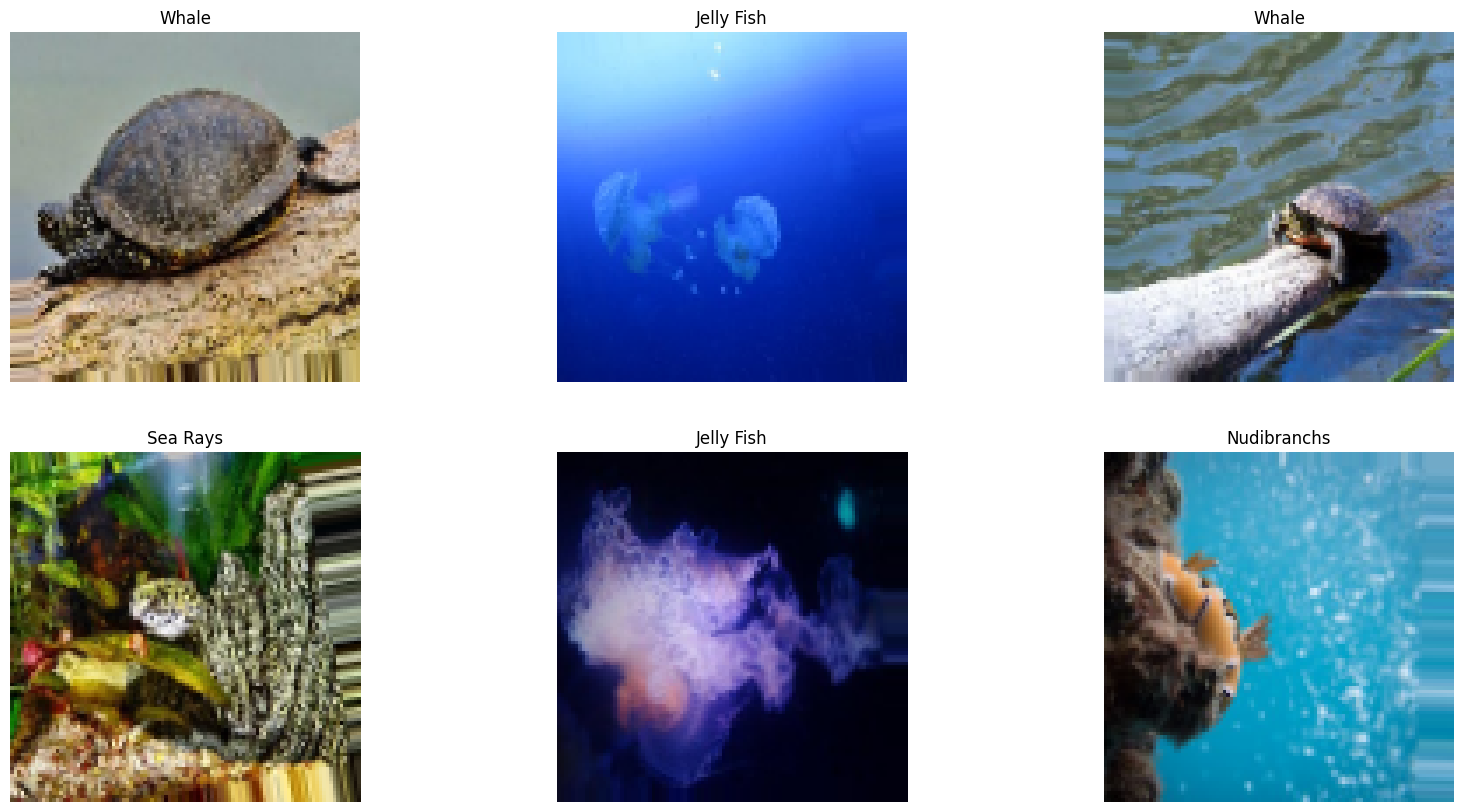

In [24]:
images, labels = next(train_data)

plt.figure(figsize=(20, 10))
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(images[i])
  plt.title(classes_name[labels[i].argmax()])
  plt.axis("off")
plt.show()

In [25]:
from tensorflow import keras

In [26]:
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=3, input_shape=(100, 100, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),

    keras.layers.Conv2D(64, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),

    keras.layers.Conv2D(64, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),

    keras.layers.Conv2D(128, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),

    keras.layers.Flatten(),

    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(23, activation="softmax")
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 98, 98, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 98, 98, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 47, 47, 64)        2

In [28]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=4)

In [29]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [30]:
history = model.fit(train_data, epochs=40, validation_data=valid_data, callbacks=[early_stopping], batch_size=batch_size)

Epoch 1/40
193/193 [==============================] - 65s 283ms/step - loss: 2.6974 - accuracy: 0.2146 - val_loss: 3.8614 - val_accuracy: 0.0573
Epoch 2/40
193/193 [==============================] - 50s 259ms/step - loss: 2.3816 - accuracy: 0.2814 - val_loss: 3.1500 - val_accuracy: 0.1470
Epoch 3/40
193/193 [==============================] - 50s 258ms/step - loss: 2.2404 - accuracy: 0.3240 - val_loss: 2.4359 - val_accuracy: 0.2726
Epoch 4/40
193/193 [==============================] - 49s 254ms/step - loss: 2.1225 - accuracy: 0.3521 - val_loss: 2.1287 - val_accuracy: 0.3549
Epoch 5/40
193/193 [==============================] - 50s 257ms/step - loss: 2.0625 - accuracy: 0.3726 - val_loss: 2.0572 - val_accuracy: 0.3762
Epoch 6/40
193/193 [==============================] - 49s 254ms/step - loss: 1.9801 - accuracy: 0.3886 - val_loss: 2.1791 - val_accuracy: 0.3600
Epoch 7/40
193/193 [==============================] - 49s 254ms/step - loss: 1.9252 - accuracy: 0.4117 - val_loss: 1.8467 - val_ac

In [31]:
loss, acc = model.evaluate(valid_data)

22/22 [==============================] - 5s 225ms/step - loss: 1.7698 - accuracy: 0.4585


In [32]:
print(f"Loss = {round(loss * 100, 2) }% Accuracy = {round(acc * 100, 2) }%")

Loss = 176.98% Accuracy = 45.85%


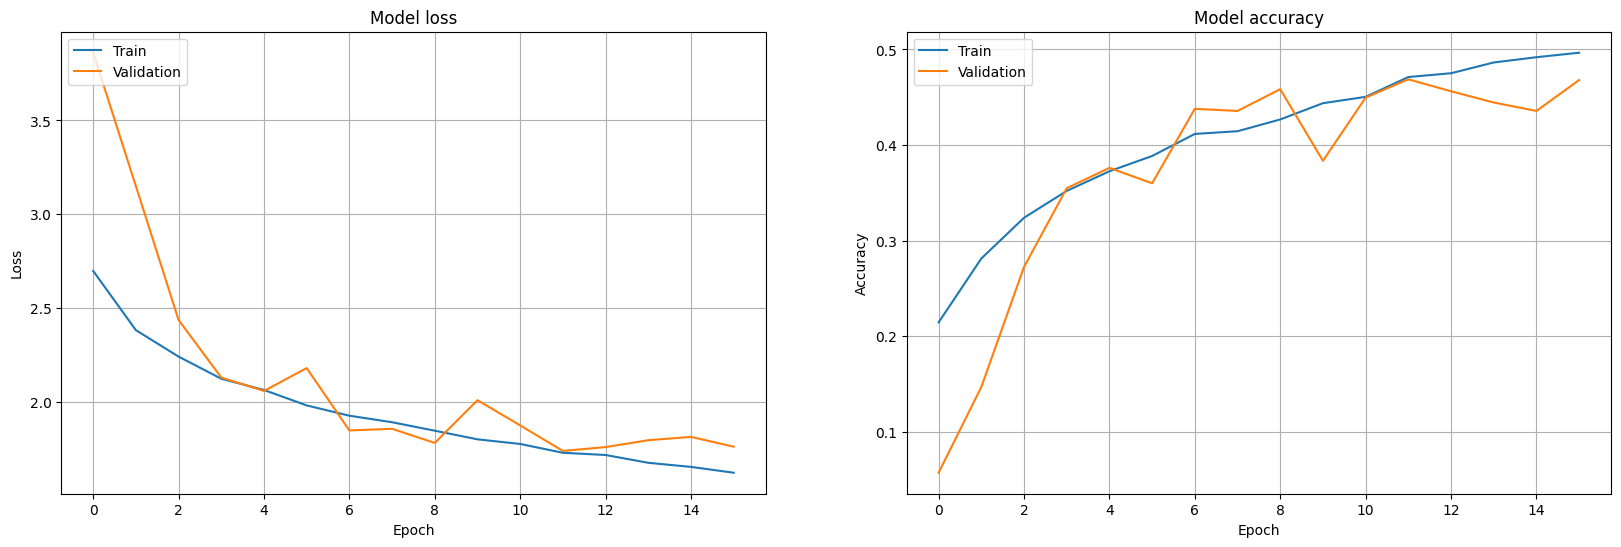

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()

In [34]:
base_model = keras.applications.vgg19.VGG19(include_top=False,weights="imagenet",input_tensor=None,input_shape=(100,100,3),
                                            pooling="max",classes=23,classifier_activation="softmax")

base_model.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


In [36]:
new_model = keras.Sequential()
new_model.add(base_model)
new_model.add(keras.layers.Flatten())
new_model.add(keras.layers.Dense(256, activation='relu'))
new_model.add(keras.layers.Dropout(0.2))
new_model.add(keras.layers.Dense(64, activation='relu'))
new_model.add(keras.layers.Dropout(0.2))
new_model.add(keras.layers.Dense(23, activation='softmax'))

In [37]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 23)               

In [38]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=4)

In [39]:
new_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [41]:
history = new_model.fit(train_data, epochs=40, validation_data=valid_data,  callbacks=[early_stopping], batch_size=batch_size)

Epoch 1/40
193/193 [==============================] - 68s 326ms/step - loss: 2.7085 - accuracy: 0.2167 - val_loss: 2.2066 - val_accuracy: 0.3622
Epoch 2/40
193/193 [==============================] - 56s 290ms/step - loss: 2.2882 - accuracy: 0.3172 - val_loss: 1.9959 - val_accuracy: 0.3857
Epoch 3/40
193/193 [==============================] - 55s 282ms/step - loss: 2.1241 - accuracy: 0.3588 - val_loss: 1.9023 - val_accuracy: 0.4306
Epoch 4/40
193/193 [==============================] - 55s 283ms/step - loss: 2.0432 - accuracy: 0.3832 - val_loss: 1.8821 - val_accuracy: 0.4533
Epoch 5/40
193/193 [==============================] - 54s 280ms/step - loss: 1.9883 - accuracy: 0.3966 - val_loss: 1.8034 - val_accuracy: 0.4570
Epoch 6/40
193/193 [==============================] - 53s 272ms/step - loss: 1.9472 - accuracy: 0.4111 - val_loss: 1.8262 - val_accuracy: 0.4555
Epoch 7/40
193/193 [==============================] - 53s 274ms/step - loss: 1.9138 - accuracy: 0.4215 - val_loss: 1.7681 - val_ac

In [42]:
loss, acc = model.evaluate(valid_data)

22/22 [==============================] - 5s 237ms/step - loss: 1.7981 - accuracy: 0.4511


In [43]:
print(f"Loss = {round(loss * 100, 2) }% Accuracy = {round(acc * 100, 2) }%")

Loss = 179.81% Accuracy = 45.11%


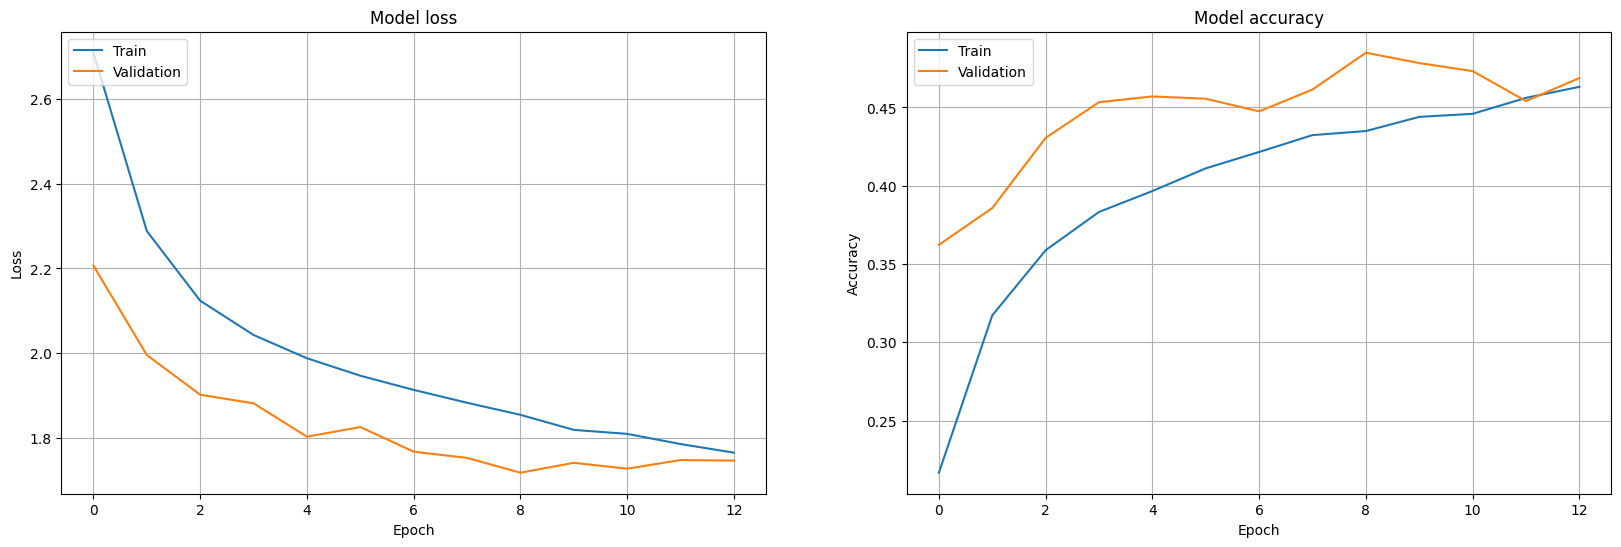

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()